In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df_org = pd.read_csv('docs/t20_bbb.csv')

C:\Users\anees\AppData\Local\Temp\ipykernel_25448\1997786846.py:1: DtypeWarning: Columns (51,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df_org = pd.read_csv('docs/t20_bbb.csv')


In [3]:
df_org=df_org[(df_org['ball']<=11)]
df_org=df_org[(df_org['over']<=20)]
df_org=df_org[(df_org['batruns']>=0) & (df_org['bowlruns']>=0)]
df_org.shape

(1675723, 57)

In [4]:
def bowl_style_clean(df,unique_styles):

    df['bowl_style'] = df['bowl_style'].replace(['RFM', 'RMF'], 'RFM')
    df['bowl_style'] = df['bowl_style'].replace(['LFM', 'LMF'], 'LFM')
    df['bowl_style'] = df['bowl_style'].replace(['LBG', 'LB'], 'RWS')
    df['bowl_style'] = df['bowl_style'].replace(['LS', 'SLA'], 'SLA')
    df['bowl_style'] = df['bowl_style'].replace(['RAB'], 'RSM')
    df['bowl_style'] = df['bowl_style'].replace(['LAB'], 'LSM')
    unique_styles = ['LFM/SLA', 'OB/LB','LM/SLA/LWS','OB/SLA','RMF/OB', 'RFM/OB', 'OB/LBG', 'RFM/LBG', 'RM/LB',
           'RM/LBG', 'LMF/RM', 'RM/RSM', 'SLA/LWS', 'RMF/LB', 'RFM/LB',
           'RM/OB/LB']
    replacements = {
        'RFM': 'RFM',
        'RMF': 'RFM',
        'LFM': 'LFM',
        'LMF': 'LFM',
        'LBG': 'RWS',
        'LB': 'RWS',
        'LS': 'SLA',
        'SLA': 'SLA',
        'RAB': 'RS',
        'LAB': 'LS'
    }

    # Iterate over unique styles and apply replacements
    for style in unique_styles:
        replaced_style = '/'.join([replacements.get(part, part) for part in style.split('/')])
        df['bowl_style'] = df['bowl_style'].replace([style], replaced_style)
    #df['bowl_style'].unique()
    return df
unique_styles = ['RFM', 'RMF', 'LBG', 'LB', 'LS', 'RAB', 'LAB', 'OB', 'SLA', 'RAB','RSM','LSM']
df=bowl_style_clean(df_org,unique_styles)
df['bowl_style'].unique()

array(['RF', 'RFM', 'RWS', 'LWS', 'SLA', 'OB', 'LFM', 'LF', 'RM', 'RM/OB',
       'LM', 'LFM/SLA', 'OB/RWS', 'LM/SLA/LWS', 'OB/SLA', 'RSM', '-',
       'LSM', 'RFM/OB', 'RFM/RWS', 'RM/RWS', 'LFM/RM', 'RM/RSM',
       'SLA/LWS', 'RM/OB/RWS', 'RS'], dtype=object)

In [5]:
df_worldcup = pd.read_csv('docs/2024 wc squad.csv', encoding='latin1')
df_worldcup.head()

Afghanistan       Australia             Bangladesh           Canada  \
0         Rashid Khan  Mitchell Marsh  Najmul Hossain Shanto   Saad Bin Zafar   
1      Ibrahim Zadran     Ashton Agar           Taskin Ahmed    Aaron Johnson   
2  Azmatullah Omarzai     Pat Cummins             Litton Das  Dillon Heyliger   
3   Najibullah Zadran       Tim David          Soumya Sarkar   Dilpreet Bajwa   
4      Mohammad Ishaq    Nathan Ellis           Tanzid Hasan     Harsh Thaker   

         England              India         Ireland             Namibia  \
0     Jos Buttler      Rohit Sharma   Paul Stirling     Gerhard Erasmus   
1       Moeen Ali     Hardik Pandya      Mark Adair          Zane Green   
2    Jofra Archer  Yashasvi Jaiswal      Ross Adair  Michael van Lingen   
3  Jonny Bairstow       Virat Kohli  Andy Balbirnie       Dylan Leicher   
4     Harry Brook  Suryakumar Yadav  Curtis Campher   Ruben Trumpelmann   

            Nepal     Netherlands        New Zealand               Oman  \
0    Rohit Paudel   Scott Edwards    Kane Williamson         Aqib Ilyas   
1    Aasif Sheikh      Aryan Dutt         Finn Allen    Zeeshan Maqsood   
2  Anil Kumar Sah    Bas de Leede        Trent Boult  Kashyap Prajapati   
3  Kushal Bhurtel  Saqib Zulfiqar  Michael Bracewell    Pratik Athavale   
4    Kushal Malla      Kyle Klein       Mark Chapman         Ayaan Khan   

  Papua New Guinea           Scotland      South Africa          Sri Lanka  \
0       Assad Vala  Richie Berrington     Aiden Markram  Wanindu Hasaranga   
1         Alei Nao      Matthew Cross  Ottniel Baartman   Charith Asalanka   
2       Chad Soper     Bradley Currie    Gerald Coetzee       Kusal Mendis   
3    Charles Amini      Chris Greaves   Quinton de Kock    Pathum Nissanka   
4        Hila Vare         Oli Carter     Bjorn Fortuin     Kamindu Mendis   

           Uganda   United States      West Indies         Pakistan  
0    Brian Masaba    Monank Patel    Rovman Powell       Babar Azam  
1   Simon Ssesazi     Aaron Jones   Alzarri Joseph     Fakhar Zaman  
2    Roger Mukasa    Andries Gous  Johnson Charles        Azam Khan  
3  Cosmas Kyewuta  Corey Anderson     Roston Chase   Iftikhar Ahmed  
4  Dinesh Nakrani        Ali Khan  Shimron Hetmyer  Mohammad Rizwan

In [6]:
team_dict = df_worldcup.to_dict(orient='list')

print(team_dict['Afghanistan'])

['Rashid Khan', 'Ibrahim Zadran', 'Azmatullah Omarzai', 'Najibullah Zadran', 'Mohammad Ishaq', 'Mohammad Nabi', 'Gulbadin Naib', 'Karim Janat', 'Nangeyalia Kharote', 'Mujeeb Ur Rahman', 'Noor Ahmad', 'Naveen-ul-Haq', 'Fazalhaq Farooqi', 'Fareed Ahmad', 'Rahmanullah Gurbaz', nan]


In [7]:
team_dict = {key.strip(): [value.strip() for value in values if pd.notna(value)] for key, values in team_dict.items()}

team_dict['Afghanistan']

['Rashid Khan',
 'Ibrahim Zadran',
 'Azmatullah Omarzai',
 'Najibullah Zadran',
 'Mohammad Ishaq',
 'Mohammad Nabi',
 'Gulbadin Naib',
 'Karim Janat',
 'Nangeyalia Kharote',
 'Mujeeb Ur Rahman',
 'Noor Ahmad',
 'Naveen-ul-Haq',
 'Fazalhaq Farooqi',
 'Fareed Ahmad',
 'Rahmanullah Gurbaz']

In [8]:
batter_list=df[['bat','p_bat']].drop_duplicates().rename(columns={"bat":"player_name","p_bat":"player_id"})
bowler_list=df[['bowl','p_bowl']].drop_duplicates().rename(columns={"bowl":"player_name","p_bowl":"player_id"})
player_list=pd.concat([batter_list,bowler_list],ignore_index=False).drop_duplicates()

In [9]:
player_groups=player_list.groupby(['player_name']).agg({'player_id':'count'})
player_groups=player_groups[player_groups['player_id']>1].sort_values('player_id',ascending=False).reset_index()
player_groups.rename(columns={'player_id':'count'},inplace=True)
player_groups[player_groups['player_name']=='Usman Khan']

player_name  count
40  Usman Khan      2

Finding the players who are not in the given dataset or the Names which is common for more than 1 player.

In [10]:
import pandas as pd

# Your existing code
players_list = np.concatenate((df['bowl'].unique(), df['bat'].unique()))

# Initialize an empty DataFrame to store the results
results = pd.DataFrame(columns=['Team', 'Player', 'Count'])

for team, players in team_dict.items():
    for player in players:
        if player not in players_list:
            temp_df = pd.DataFrame({'Team': [team], 'Player': [player], 'Count': ['Not in players_list']})
            results = pd.concat([results, temp_df], ignore_index=True)
        if player in player_groups['player_name'].unique():
            count = player_groups[player_groups['player_name'] == player]['count'].values[0]
            temp_df = pd.DataFrame({'Team': [team], 'Player': [player], 'Count': [count]})
            results = pd.concat([results, temp_df], ignore_index=True)

# Print the results
results


Team             Player                Count
0     Afghanistan        Rashid Khan                    2
1          Canada  Kanwarpal Tathgur  Not in players_list
2           India       Rohit Sharma                    2
3           Nepal     Anil Kumar Sah  Not in players_list
4     New Zealand     Daryl Mitchell                    2
5            Oman        Shoaib Khan                    2
6          Uganda        Ronak Patel                    2
7   United States           Ali Khan                    2
8   United States    Shayan Jahangir  Not in players_list
9        Pakistan          Azam Khan                    2
10       Pakistan         Usman Khan                    2

In [11]:
players=set()
for key,vals in team_dict.items():
    players.update(vals)

In [12]:
df_player_id_combs=df[['bat','p_bat','bowl','p_bowl']].drop_duplicates()

In [13]:
# Create a mapping of player names to player IDs
player_id_map = {}
for index, row in df_player_id_combs.iterrows():
    if row['bat'] in player_id_map:
        continue
    player_id_map[row['bat']] = row['p_bat']
    player_id_map[row['bowl']] = row['p_bowl']
# Initialize lists to store data
player_names = []
countries = []
player_ids = []

# Iterate over the dictionary
for country, players in team_dict.items():
    for player in players:
        player_names.append(player)
        countries.append(country)
        player_ids.append(player_id_map.get(player, None))

# Create DataFrame from lists
team_df = pd.DataFrame({'Player': player_names, 'Country': countries, 'p_id': player_ids})
team_df['p_id'] = team_df['p_id'].astype('Int64')
team_df.head()

Player      Country     p_id
0         Rashid Khan  Afghanistan   793463
1      Ibrahim Zadran  Afghanistan   921509
2  Azmatullah Omarzai  Afghanistan   819429
3   Najibullah Zadran  Afghanistan   524049
4      Mohammad Ishaq  Afghanistan  1076579

After crosschecking all the player names with multiple player ids, we found one player which is mapped to wrong player id.

In [14]:
team_df.loc[team_df['Player'] == 'Usman Khan', 'p_id'] = 1123428

Filtering the data of players who are included in the world cup.

In [15]:
matches_relevant=df[df['p_bat'].isin(team_df['p_id'].unique()) | df['p_bowl'].isin(team_df['p_id'].unique())]['p_match'].unique()
df=df[df['p_match'].isin(matches_relevant)]
df.shape

(1273918, 57)

In [16]:
worldcup_pitches=['Kensington Oval, Bridgetown, Barbados',
                  'Sir Vivian Richards Stadium, North Sound, Antigua',
                  'Providence Stadium, Guyana',
                  'Daren Sammy National Cricket Stadium, Gros Islet, St Lucia',
                  'Brian Lara Stadium, Tarouba, Trinidad',
                  'Arnos Vale Ground, Kingstown, St Vincent',
                  'Central Broward Regional Park Stadium Turf Ground, Lauderhill',
                  'Nassau County International Cricket Stadium',
                  'Grand Prairie Stadium'
                 ]

In [17]:
df.columns

Index(['p_match', 'inns', 'bat', 'p_bat', 'team_bat', 'bowl', 'p_bowl',
       'team_bowl', 'ball', 'ball_id', 'outcome', 'score', 'out', 'dismissal',
       'p_out', 'over', 'noball', 'wide', 'byes', 'legbyes', 'cur_bat_runs',
       'cur_bat_bf', 'cur_bowl_ovr', 'cur_bowl_wkts', 'cur_bowl_runs',
       'inns_runs', 'inns_wkts', 'inns_balls', 'inns_runs_rem',
       'inns_balls_rem', 'inns_rr', 'inns_rrr', 'target', 'max_balls', 'date',
       'year', 'ground', 'country', 'winner', 'toss', 'competition',
       'bat_hand', 'bowl_style', 'bowl_kind', 'batruns', 'ballfaced',
       'bowlruns', 'bat_out', 'wagonX', 'wagonY', 'wagonZone', 'line',
       'length', 'shot', 'control', 'predscore', 'wprob'],
      dtype='object')

In [18]:
def custom_agg(x):
    result = (x['batruns'].sum() * 120) / x['ballfaced'].sum()
    return round(result, 2)
def get_ground_avgscores(df):
    df1=df[df['ground'].isin(worldcup_pitches)].groupby(['p_match', 'inns','ground']).agg({'batruns':'sum','ballfaced':'sum'}).reset_index()
    # Define custom aggregation function
    # Group by 'inns' and 'ground', and aggregate using custom aggregation function
    result_df = df1.groupby(['ground']).apply(custom_agg).reset_index(name='average_score')

    return result_df
df_groundavg=get_ground_avgscores(df)
df_groundavg

ground  average_score
0              Brian Lara Stadium, Tarouba, Trinidad         140.95
1  Central Broward Regional Park Stadium Turf Gro...         153.98
2  Daren Sammy National Cricket Stadium, Gros Isl...         152.78
3              Kensington Oval, Bridgetown, Barbados         147.34
4                         Providence Stadium, Guyana         145.48
5  Sir Vivian Richards Stadium, North Sound, Antigua         134.26

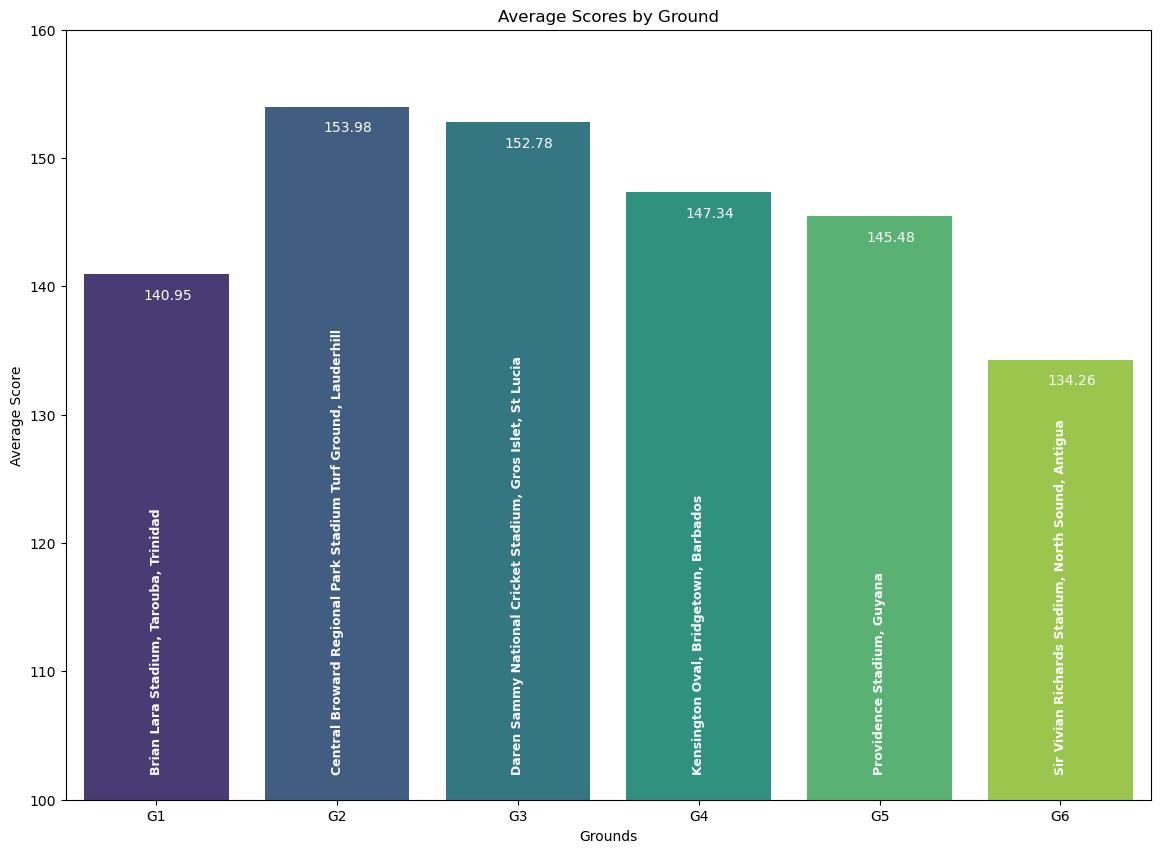

In [19]:
# Create a dictionary for ground indexes
ground_index = {ground: f'G{i}' for i, ground in enumerate(df_groundavg['ground'].unique(), 1)}

# Add the index to the dataframe
df_groundavg['ground_index'] = df_groundavg['ground'].map(ground_index)

plt.figure(figsize=(14, 10))

# Create the bar plot
ax = sns.barplot(x='ground_index', y='average_score', data=df_groundavg, palette='viridis')

#ax.set_ylim([100, None])

# Annotate bars with ground names outside and scores inside
for p, label in zip(ax.patches, df_groundavg['ground']):
    height = p.get_height()
    ax.annotate(format(height, '.2f'), 
                (p.get_x() + p.get_width() / 2., height), 
                ha = 'center', va = 'center', 
                xytext = (8, -15), 
                textcoords = 'offset points', color='white')
    
    ax.annotate(label, 
                (p.get_x() + p.get_width() / 2., 102), 
                ha = 'center', va = 'bottom', 
                fontsize=9, rotation=90, color='white',weight="bold")

# Title and labels
plt.ylim(100,160)
plt.title('Average Scores by Ground')
plt.xlabel('Grounds')
plt.ylabel('Average Score')

# # Create the legend for ground names
# handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(handles, ['Innings 1', 'Innings 2'], title='Innings')

plt.show()

In [20]:
df_groundavg.to_csv('docs/WC Analysis results/scoreavg_ground.csv')

In [21]:
def get_ground_batstats_vs_bowlkind(df):
    df2=df[(df['ground'].isin(worldcup_pitches))&(df['bowl_kind'].isin(['pace bowler','spin bowler']))]
    df2_runs=df2.groupby(['ground','bowl_kind']).agg({'batruns':'sum','ballfaced':'sum','p_match':'nunique'}).reset_index()
    df2_outs=df[(df['out']==True)&(df['ground'].isin(worldcup_pitches))&(df['bowl_kind'].isin(['pace bowler','spin bowler']))].groupby(['ground','bowl_kind']).size().reset_index(name='outs')
    df2_batting=pd.merge(df2_runs,df2_outs,on=['ground','bowl_kind'])
    df2_batting['average']=round(df2_batting['batruns']/df2_batting['outs'],2)
    df2_batting['strike rate']=round(df2_batting['batruns']*100/df2_batting['ballfaced'],2)
    df2_batting.drop(columns=['batruns','ballfaced','outs'],inplace=True)
    df2_batting.rename(columns={'p_match':'matches'},inplace=True)
    return df2_batting
df2_batting=get_ground_batstats_vs_bowlkind(df)
df2_batting.head()

ground    bowl_kind  matches  \
0              Brian Lara Stadium, Tarouba, Trinidad  pace bowler       43   
1              Brian Lara Stadium, Tarouba, Trinidad  spin bowler       43   
2  Central Broward Regional Park Stadium Turf Gro...  pace bowler       21   
3  Central Broward Regional Park Stadium Turf Gro...  spin bowler       21   
4  Daren Sammy National Cricket Stadium, Gros Isl...  pace bowler       15   

   average  strike rate  
0    20.98       128.26  
1    20.71       106.38  
2    25.00       138.15  
3    23.08       113.52  
4    20.67       131.66

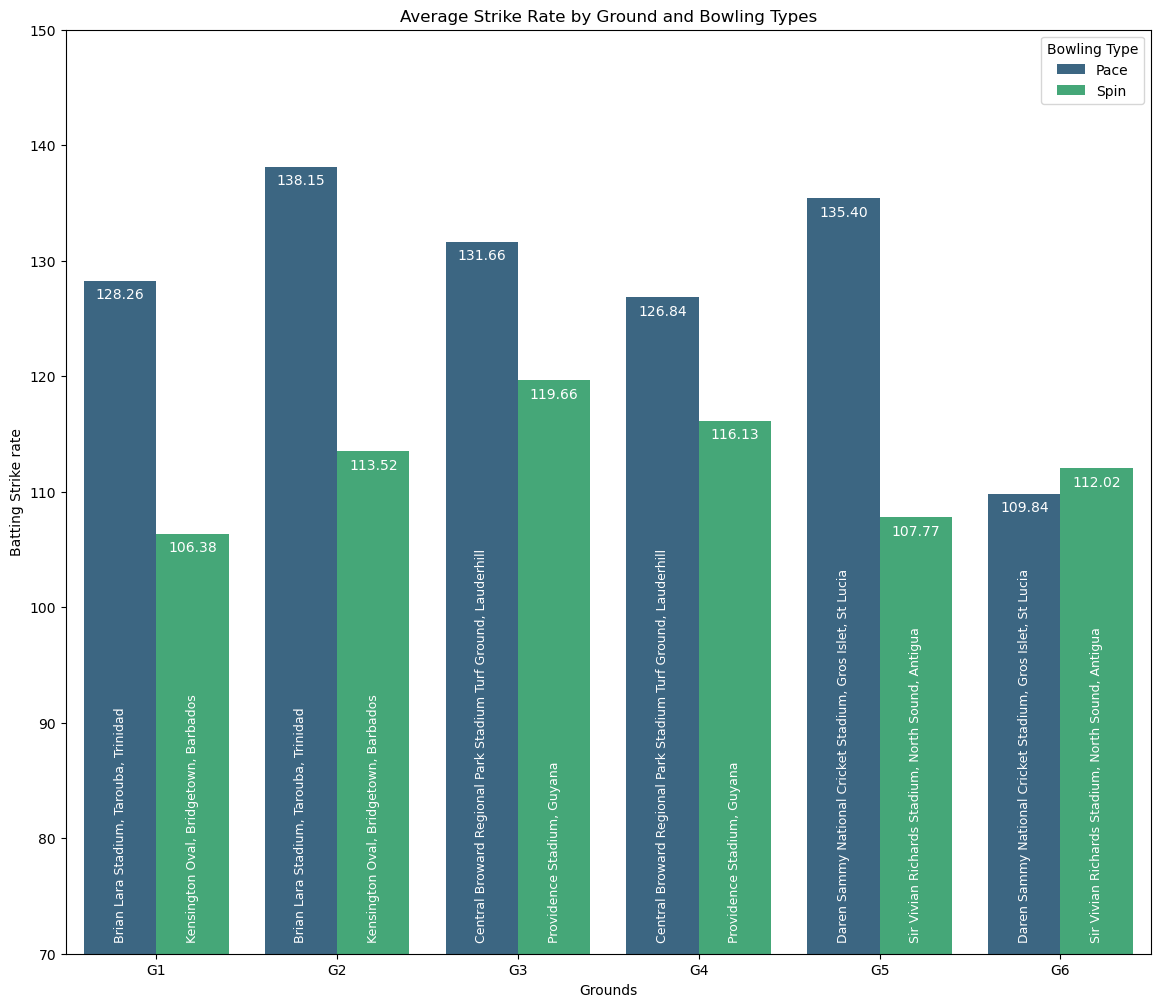

In [22]:
ground_index = {ground: f'G{i}' for i, ground in enumerate(df2_batting['ground'].unique(), 1)}

# Add the index to the dataframe
df2_batting['ground_index'] = df2_batting['ground'].map(ground_index)

plt.figure(figsize=(14, 12))

# Create the bar plot
ax = sns.barplot(x='ground_index', y='strike rate', hue='bowl_kind', data=df2_batting, palette='viridis')

# Annotate bars with ground names outside and scores inside
for p, label in zip(ax.patches, df2_batting['ground']):
    height = p.get_height()
    ax.annotate(format(height, '.2f'), 
                (p.get_x() + p.get_width() / 2., height), 
                ha = 'center', va = 'center', 
                xytext = (0, -10), 
                textcoords = 'offset points', color='white')
    
    ax.annotate(label, 
                (p.get_x() + p.get_width() / 2., 71), 
                ha = 'center', va = 'bottom', 
                fontsize=9, rotation=90, color='white')

plt.ylim(70,150)
# Title and labels
plt.title('Average Strike Rate by Ground and Bowling Types')
plt.xlabel('Grounds')
plt.ylabel('Batting Strike rate')

# Create the legend for ground names
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Pace', 'Spin'], title='Bowling Type')

plt.show()

In [23]:
df2_batting.to_csv("docs/WC Analysis results/batting_bowlkind_by_ground.csv")

In [24]:
def get_battingstats(df):
    df3=pd.merge(df[df['bat'].isin(team_df[team_df['p_id'].isna()==False]['Player'])],team_df[team_df['p_id'].isna()==False],left_on='p_bat',right_on='p_id',how='inner')
    df3_bat=df3.groupby(['Country']).agg({'batruns':'sum','ballfaced':'sum','p_match':'nunique'}).reset_index()
    df3_outs=df3[df3['out']==True].groupby(['Country']).size().reset_index(name='outs')
    df3_bat_stats=pd.merge(df3_bat,df3_outs,on='Country')
    df3_bat_stats['bat_avg']=round(df3_bat_stats['batruns']/df3_bat_stats['outs'],2)
    df3_bat_stats['bat_sr']=round(df3_bat_stats['batruns']*100/df3_bat_stats['ballfaced'],2)
    df3_bat_stats['ball_per_wkt']=round(df3_bat_stats['ballfaced']/df3_bat_stats['outs'],2)
    df3_dots=df3[(df3['bowlruns']==0) & (df3['ballfaced']==1)].groupby(['Country']).agg({'ballfaced':'sum'}).reset_index()
    df3_dots.rename(columns={'ballfaced':'dotballs'},inplace=True)
    df3_bat_stats=pd.merge(df3_bat_stats,df3_dots,on="Country")
    df3_bat_stats['dot%']=(df3_bat_stats['dotballs']*100/df3_bat_stats['ballfaced']).round(2)
    def custom_agg(x):
        boundary_runs = x['batruns'].sum()
        return boundary_runs
    # Apply the custom aggregation function and reset index
    df3_bd = df3[((df3['batruns'] == 4) | (df3['batruns'] == 6)) & (df3['ballfaced'] == 1)] \
                .groupby(['Country']).apply(custom_agg).reset_index(name='boundary_runs')
    df3_bat_stats=pd.merge(df3_bat_stats,df3_bd,on="Country")
    df3_bat_stats['boundary%']=(df3_bat_stats['boundary_runs']*100/df3_bat_stats['batruns']).round(2)
    df3_bat_stats.drop(columns=['batruns', 'ballfaced', 'dotballs','boundary_runs','outs'],inplace=True)
    df3_bat_stats.rename(columns={'p_match':'matches_batted'},inplace=True)
    return df3_bat_stats
df3_bat_stats=get_battingstats(df)
df3_bat_stats.head()

Country  matches_batted  bat_avg  bat_sr  ball_per_wkt   dot%  \
0  Afghanistan             742    21.04  136.08         15.46  38.68   
1    Australia            1043    29.11  142.94         20.36  33.89   
2   Bangladesh             625    22.18  121.91         18.20  38.51   
3       Canada              46    29.84  136.81         21.81  37.42   
4      England            1247    27.51  144.90         18.99  34.67   

   boundary%  
0      61.98  
1      60.12  
2      56.56  
3      60.04  
4      63.27

In [25]:
def get_bowling_stats(df):
    df4=pd.merge(df[df['bowl'].isin(team_df[team_df['p_id'].isna()==False]['Player'])],team_df[team_df['p_id'].isna()==False],left_on='p_bowl',right_on='p_id',how='inner')
    df4_bowl=df4.groupby(['Country']).agg({'bowlruns':'sum','ballfaced':'sum','p_match':'nunique'}).reset_index()
    df4_bowl['economy']=(df4_bowl['bowlruns']*6/df4_bowl['ballfaced']).round(2)
    df4_outs=df4[df4['out']==True].groupby(['Country']).size().reset_index(name='outs')
    df4_bowl_stats=pd.merge(df4_bowl,df4_outs,on='Country')
    df4_bowl_stats['bowl_avg']=round(df4_bowl_stats['bowlruns']/df4_bowl_stats['outs'],2)
    df4_bowl_stats['bowl_sr']=round(df4_bowl_stats['ballfaced']/df4_bowl_stats['outs'],2)
    df4_bowl_stats.drop(columns=['bowlruns','ballfaced','outs'],inplace=True)
    df4_bowl_stats.rename(columns={'p_match':'matches_bowled'},inplace=True)
    return df4_bowl_stats
df4_bowl_stats=get_bowling_stats(df)
df4_bowl_stats.head()

Country  matches_bowled  economy  bowl_avg  bowl_sr
0  Afghanistan             984     7.18     21.36    17.86
1    Australia             817     7.96     24.28    18.30
2   Bangladesh             664     7.44     21.08    16.99
3       Canada              45     6.76     18.70    16.59
4      England             956     8.11     23.12    17.10

In [26]:
overall_team_stats1=pd.merge(df3_bat_stats,df4_bowl_stats,on='Country').sort_values('matches_batted',ascending=False).reset_index().drop(columns='index').head(10)
overall_team_stats1.set_index('Country', inplace=True)

overall_team_stats2=pd.merge(df3_bat_stats,df4_bowl_stats,on='Country').sort_values('matches_batted',ascending=False).reset_index().drop(columns='index').tail(10)
overall_team_stats2.set_index('Country', inplace=True)

In [27]:
overall_team_stats1

matches_batted  bat_avg  bat_sr  ball_per_wkt   dot%  boundary%  \
Country                                                                         
England                 1247    27.51  144.90         18.99  34.67      63.27   
Australia               1043    29.11  142.94         20.36  33.89      60.12   
West Indies              974    25.75  140.99         18.26  39.39      66.36   
New Zealand              838    28.16  137.33         20.50  34.00      58.14   
Pakistan                 800    28.30  132.42         21.37  34.65      57.91   
South Africa             797    28.61  136.65         20.94  34.11      58.48   
India                    744    31.11  140.32         22.17  34.14      61.00   
Afghanistan              742    21.04  136.08         15.46  38.68      61.98   
Bangladesh               625    22.18  121.91         18.20  38.51      56.56   
Sri Lanka                438    25.68  128.52         19.98  36.27      57.05   

              matches_bowled  economy  bowl_avg  bowl_sr  
Country                                                   
England                  956     8.11     23.12    17.10  
Australia                817     7.96     24.28    18.30  
West Indies              683     8.29     23.41    16.94  
New Zealand              794     8.09     23.17    17.18  
Pakistan                 797     7.49     21.73    17.40  
South Africa             622     7.52     21.35    17.04  
India                    745     7.85     24.09    18.42  
Afghanistan              984     7.18     21.36    17.86  
Bangladesh               664     7.44     21.08    16.99  
Sri Lanka                435     7.62     23.07    18.16

In [28]:
overall_team_stats1.drop(columns=['matches_batted','matches_bowled'],inplace=True)
overall_team_stats2.drop(columns=['matches_batted','matches_bowled'],inplace=True)

In [29]:
overall_team_stats=pd.concat([overall_team_stats1,overall_team_stats2],ignore_index=False)
overall_team_stats.to_csv("docs/WC Analysis results/overall_team_stats.csv")

In [30]:
cols_increase=['bat_avg','ball_per_wkt','bat_sr','boundary%']
cols_decrease=['dot%','economy','bowl_avg','bowl_sr']
def normalization(cols_increase, cols_decrease, overall_team_stats):
    # Create an empty DataFrame for normalized values
    normalized_df = pd.DataFrame(index=overall_team_stats.index)
    
    # Normalize columns where an increase is favorable
    for col in cols_increase:
        mean = overall_team_stats[col].mean()
        std = overall_team_stats[col].std()
        normalized_df[col] = (overall_team_stats[col] - mean) / std

    # Normalize columns where a decrease is favorable
    for col in cols_decrease:
        mean = overall_team_stats[col].mean()
        std = overall_team_stats[col].std()
        normalized_df[col] = (mean - overall_team_stats[col]) / std
    
    # Rank the teams based on normalized values
    ranked_df = normalized_df.rank(axis=0, method='min', ascending=False).astype(int)
    
    # Calculate the overall rank as the mean of individual ranks
    ranked_df['overallrank'] = normalized_df.mean(axis=1).rank(method='max', ascending=False).astype(int)
    
    # Sort the DataFrame based on the overall rank
    ranked_df = ranked_df.sort_values(by='overallrank')
    
    return normalized_df, ranked_df
normalized_df1,ranked_df1=normalization(cols_increase,cols_decrease,overall_team_stats1)
normalized_df2,ranked_df2=normalization(cols_increase,cols_decrease,overall_team_stats2)
normalized_df1

bat_avg  ball_per_wkt    bat_sr  boundary%      dot%   economy  \
Country                                                                         
England       0.243762     -0.324119  1.243404   1.025673  0.526057 -0.993528   
Australia     0.753591      0.377371  0.963088   0.010634  0.879480 -0.573727   
West Indies  -0.317050     -0.697905  0.684201   2.021378 -1.612606 -1.497289   
New Zealand   0.450880      0.449056  0.160753  -0.627391  0.829638 -0.937555   
Pakistan      0.495490      0.894527 -0.541469  -0.701505  0.535119  0.741648   
South Africa  0.594270      0.674352  0.063500  -0.517831  0.779796  0.657688   
India         1.390878      1.304156  0.588379   0.294200  0.766203 -0.265874   
Afghanistan  -1.817860     -2.131607 -0.018020   0.609990 -1.290901  1.609236   
Bangladesh   -1.454607     -0.728628 -2.044595  -1.136522 -1.213873  0.881581   
Sri Lanka    -0.339355      0.182797 -1.099241  -0.978627 -0.198914  0.377821   

              bowl_avg   bowl_sr  
Country                           
England      -0.383113  0.748720  
Australia    -1.361992 -1.297895  
West Indies  -0.627833  1.021602  
New Zealand  -0.425306  0.612279  
Pakistan      0.789854  0.237066  
South Africa  1.110522  0.851050  
India        -1.201659 -1.502556  
Afghanistan   1.102083 -0.547469  
Bangladesh    1.338364  0.936326  
Sri Lanka    -0.340920 -1.059123

In [31]:
normalized_df1.mean(axis=1)

Country
England         0.260857
Australia      -0.031181
West Indies    -0.128188
New Zealand     0.064044
Pakistan        0.306341
South Africa    0.526668
India           0.171716
Afghanistan    -0.310569
Bangladesh     -0.427744
Sri Lanka      -0.431945
dtype: float64

In [32]:
normalized_df1.mean(axis=1).rank(method='max', ascending=False).astype(int)

Country
England          3
Australia        6
West Indies      7
New Zealand      5
Pakistan         2
South Africa     1
India            4
Afghanistan      8
Bangladesh       9
Sri Lanka       10
dtype: int32

In [33]:
ranked_df1.head()

bat_avg  ball_per_wkt  bat_sr  boundary%  dot%  economy  \
Country                                                                 
South Africa        3             3       6          6     3        4   
Pakistan            4             2       8          8     5        3   
England             6             7       1          2     6        9   
India               1             1       4          4     4        6   
New Zealand         5             4       5          7     2        8   

              bowl_avg  bowl_sr  overallrank  
Country                                       
South Africa         2        3            1  
Pakistan             4        6            2  
England              6        4            3  
India                9       10            4  
New Zealand          7        5            5

In [34]:
ranked_df2.head()

bat_avg  ball_per_wkt  bat_sr  boundary%  dot%  economy  \
Country                                                                     
Canada                  1             1       1          2     2        3   
Nepal                   2             4       2          3     1        5   
Uganda                  6             3       9          6    10        1   
Papua New Guinea        7             5       7          9     9        2   
United States           3             2       4          5     6        7   

                  bowl_avg  bowl_sr  overallrank  
Country                                           
Canada                   3        5            1  
Nepal                    4        3            2  
Uganda                   1        1            3  
Papua New Guinea         2        2            4  
United States            9        7            5

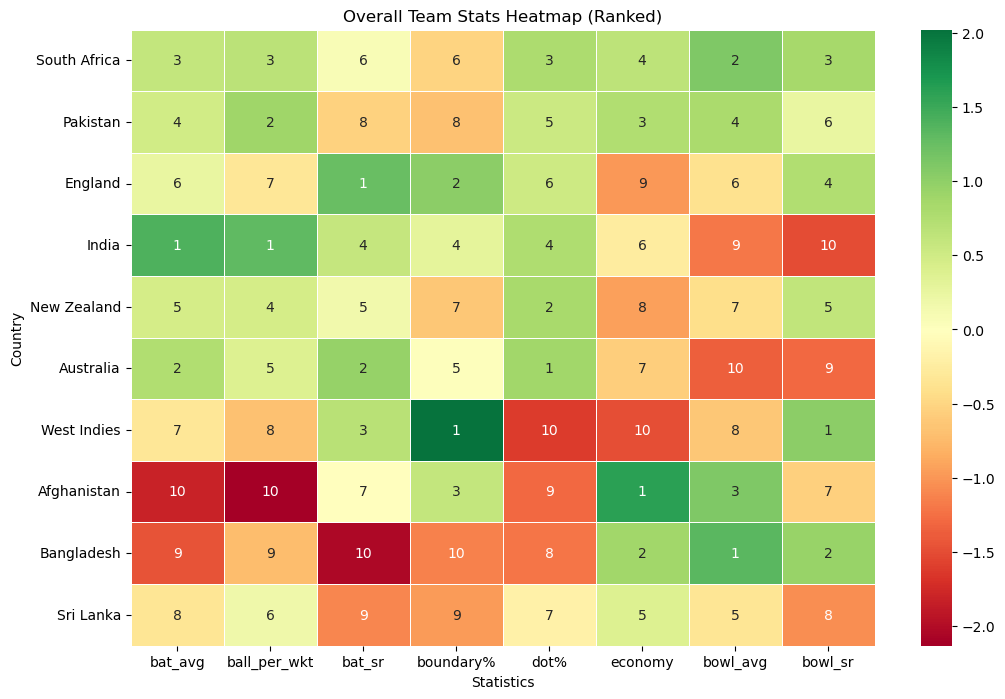

In [35]:
normalized_df1=normalized_df1.reindex(ranked_df1.index)
normalized_df2=normalized_df2.reindex(ranked_df2.index)
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_df1, annot=ranked_df1.drop(columns='overallrank'), fmt='d', cmap='RdYlGn', linewidths=.5, center=0)

# Title and labels
plt.title('Overall Team Stats Heatmap (Ranked)')
plt.xlabel('Statistics')
plt.ylabel('Country')

# Show the plot
plt.show()

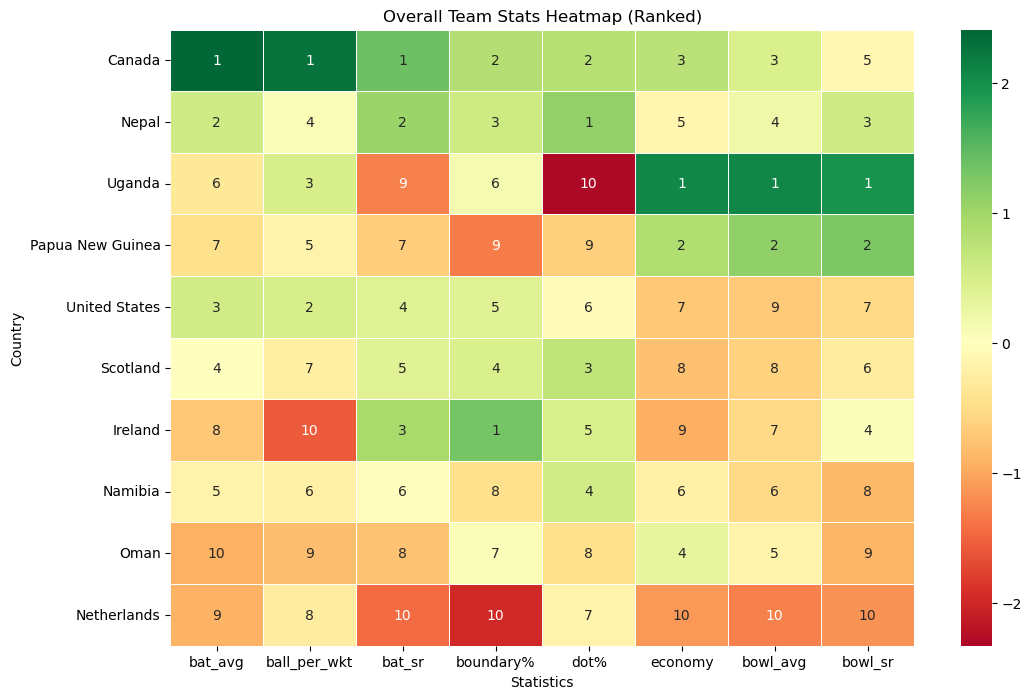

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_df2, annot=ranked_df2.drop(columns='overallrank'), fmt='d', cmap='RdYlGn', linewidths=.5, center=0)

# Title and labels
plt.title('Overall Team Stats Heatmap (Ranked)')
plt.xlabel('Statistics')
plt.ylabel('Country')

# Show the plot
plt.show()

In [37]:
normalized_df1.to_csv("docs/WC Analysis results/normalised_overallstats_top10.csv")
normalized_df2.to_csv("docs/WC Analysis results/normalised_overallstats_bottom10.csv")

In [38]:
df_bat_pp=get_battingstats((df[df['over']<=5]))
df_bat_mid=get_battingstats(df[(df['over']>=6)&(df['over']<=14)])
df_bat_death=get_battingstats(df[(df['over']>=15)])
df_bowl_pp=get_bowling_stats(df[df['over']<=5])
df_bowl_mid=get_bowling_stats(df[(df['over']>=6)&(df['over']<=14)])
df_bowl_death=get_bowling_stats(df[(df['over']>=15)])

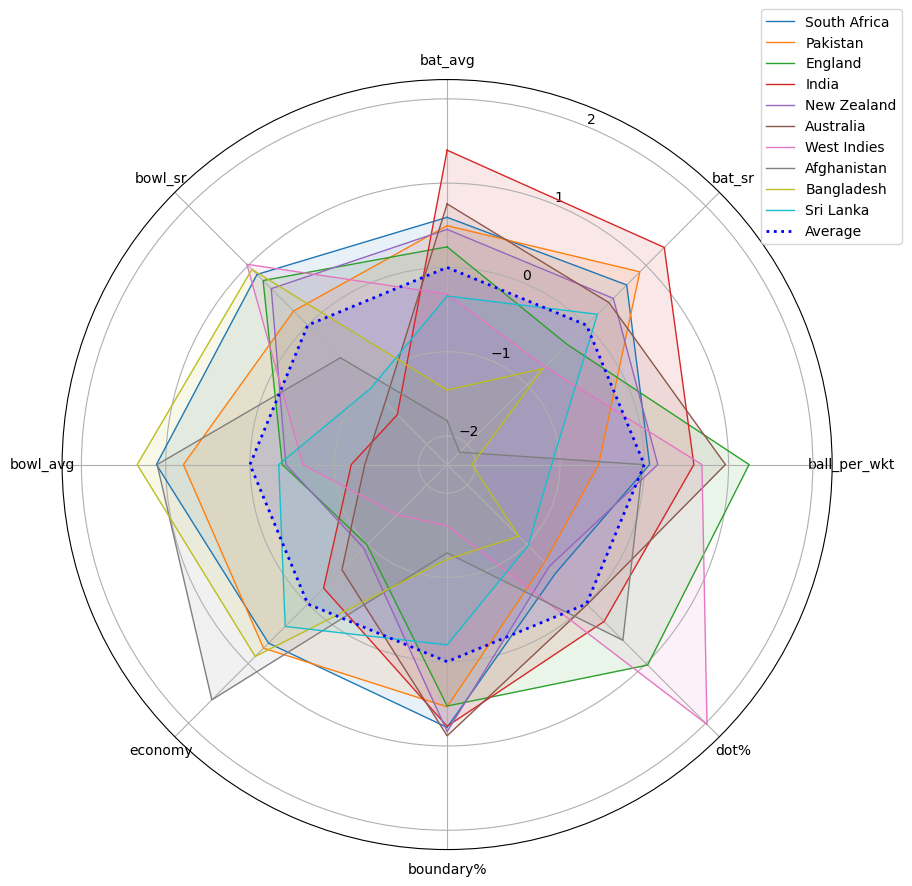

In [39]:
#df=overall_team_stats
# Normalize the data

# Calculate the average values for normalized data
averages = normalized_df1.mean()

# Plot
attributes = overall_team_stats1.columns
num_vars = len(attributes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], attributes)

# Plot each individual country
for country in normalized_df1.index:
    values = normalized_df1.loc[country].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=country)
    ax.fill(angles, values, alpha=0.1)

# Plot the average values
average_values = averages.tolist()
average_values += average_values[:1]
ax.plot(angles, average_values, linewidth=2, linestyle='dotted', label='Average', color='blue')

# Fill area for the average values
ax.fill(angles, average_values, 'b', alpha=0.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.show()

In [40]:
def spider_plot_stats(normalized_df, country):

    # Calculate the average values for normalized data
    averages = normalized_df.mean()
    
    # Find the lowest and highest values in the normalized DataFrame
    lowest_val = normalized_df.min().min()
    highest_val = normalized_df.max().max()
    
    # Plot
    attributes = normalized_df.columns
    num_vars = len(attributes)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable and add labels
    plt.xticks(angles[:-1], attributes)

    # Set the range for the radial limits
    ax.set_ylim(lowest_val, highest_val)

    # Plot each individual country
    values = normalized_df.loc[country].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=country)
    ax.fill(angles, values, alpha=0.1)

    # Plot the average values
    average_values = averages.tolist()
    average_values += average_values[:1]
    ax.plot(angles, average_values, linewidth=2, linestyle='dotted', label='Average', color='blue')

    # Fill area for the average values
    ax.fill(angles, average_values, 'b', alpha=0.1)

    # Add a legend
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    # Show the plot
    plt.show()

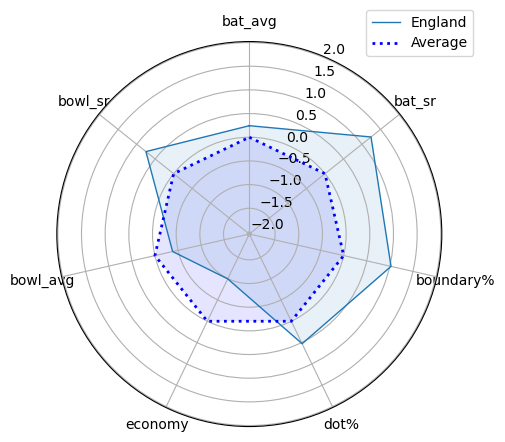

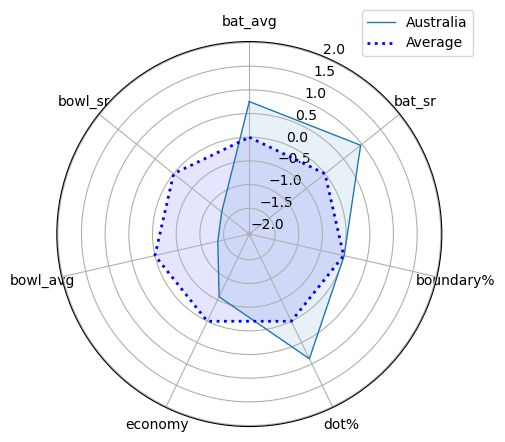

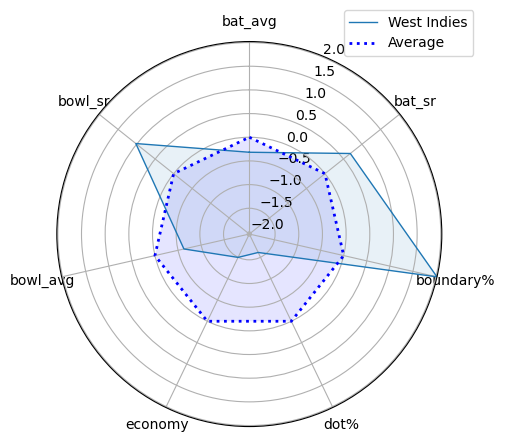

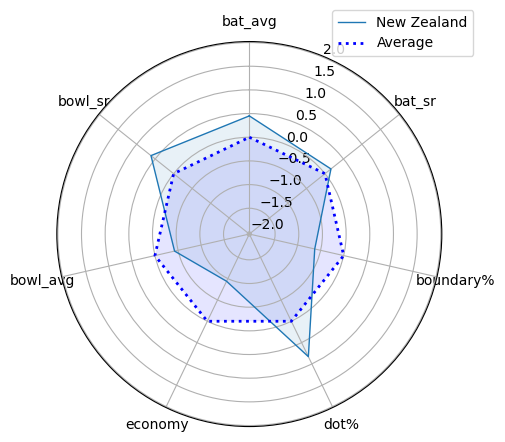

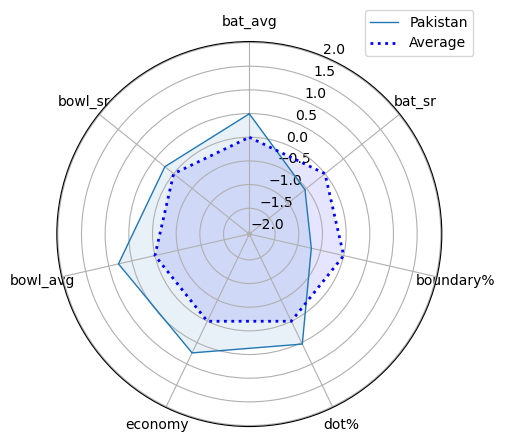

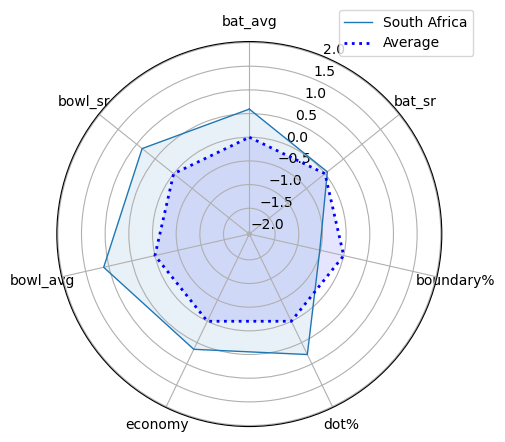

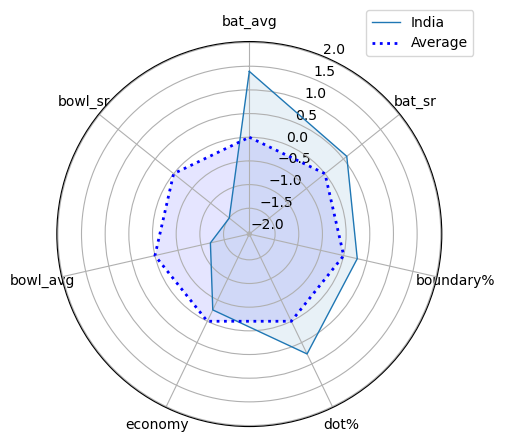

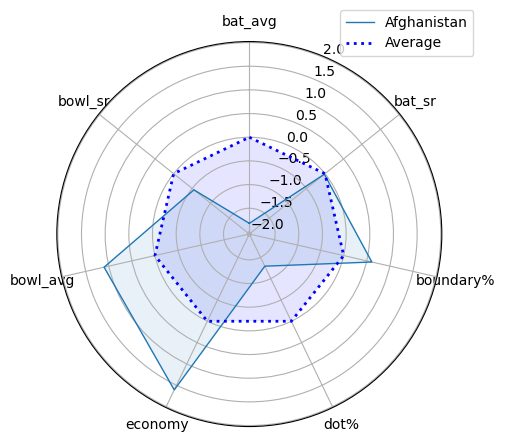

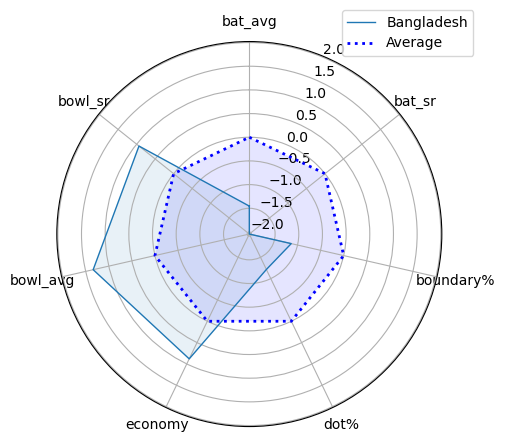

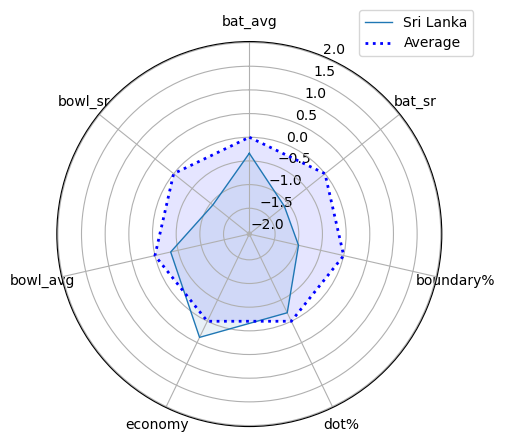

In [41]:
normalized_df,_=normalization(['bat_avg','bat_sr','boundary%'],['dot%','economy','bowl_avg','bowl_sr'],overall_team_stats1)
for country in normalized_df.index:
    spider_plot_stats(normalized_df,country)

In [42]:
df_bat_pp['Phase'] = 'pp'
df_bat_mid['Phase'] = 'mid'
df_bat_death['Phase'] = 'death'
df_bowl_pp['Phase'] = 'pp'
df_bowl_mid['Phase'] = 'mid'
df_bowl_death['Phase'] = 'death'

In [43]:
# Function to normalize and calculate the 'bowl' column
def normalize_and_calculate_bowl(df):
    df_norm, _ = normalization([], ['economy', 'bowl_avg'], df[['economy', 'bowl_avg']])
    for col in df_norm.columns:
        df.loc[:, col] = df_norm[col]
    df['bowl'] = round(0.5 * df['economy'] + 0.5 * df['bowl_avg'], 2)
    df.drop(columns=['economy', 'bowl_avg'], inplace=True)
    return df

# Function to normalize and calculate the 'bat' column
def normalize_and_calculate_bat(df):
    df_norm, _ = normalization(['bat_avg', 'bat_sr'], [], df[['bat_avg', 'bat_sr']])
    for col in df_norm.columns:
        df.loc[:, col] = df_norm[col]
    df['bat'] = round(0.5 * df['bat_avg'] + 0.5 * df['bat_sr'], 2)
    df.drop(columns=['bat_avg', 'bat_sr'], inplace=True)
    return df

# Function to separate, normalize, and calculate phases for given dataframes
def process_phases(df, team_stats1, team_stats2, normalize_func):
    df1 = df[df['Country'].isin(team_stats1.index)].copy()
    df2 = df[df['Country'].isin(team_stats2.index)].copy()

    df1 = normalize_func(df1)
    df2 = normalize_func(df2)
    
    return df1, df2

# Concatenate the bowling data and drop unnecessary columns
df_phases_bowl = pd.concat([df_bowl_pp, df_bowl_mid, df_bowl_death], ignore_index=True)
df_phases_bowl.drop(columns=['matches_bowled', 'bowl_sr'], inplace=True)

# Process bowling phases
df_phases_bowl1, df_phases_bowl2 = process_phases(df_phases_bowl, overall_team_stats1, overall_team_stats2, normalize_and_calculate_bowl)

# Concatenate the batting data and drop unnecessary columns
df_phases_bat = pd.concat([df_bat_pp, df_bat_mid, df_bat_death], ignore_index=True)
df_phases_bat.drop(columns=['matches_batted', 'dot%', 'boundary%'], inplace=True)

# Process batting phases
df_phases_bat1, df_phases_bat2 = process_phases(df_phases_bat, overall_team_stats1, overall_team_stats2, normalize_and_calculate_bat)

# Display the first few rows of the processed dataframes
print(df_phases_bowl2.head())
print(df_phases_bat1.head())

       Country Phase  bowl
3       Canada    pp  1.02
6      Ireland    pp -0.17
7      Namibia    pp -0.31
8        Nepal    pp -0.43
9  Netherlands    pp -0.71
       Country  ball_per_wkt Phase   bat
0  Afghanistan         19.70    pp -0.14
1    Australia         27.02    pp  0.60
2   Bangladesh         21.08    pp -1.00
4      England         23.13    pp  0.62
5        India         26.28    pp  0.33


In [44]:
# Initialize final DataFrames
df_phases1 = pd.DataFrame(columns=['Country', 'batting_pp', 'bowling_pp', 'batting_mid', 'bowling_mid', 'batting_death', 'bowling_death'])
df_phases2 = pd.DataFrame(columns=['Country', 'batting_pp', 'bowling_pp', 'batting_mid', 'bowling_mid', 'batting_death', 'bowling_death'])

# Assign unique countries
df_phases1['Country'] = df_phases_bowl1['Country'].unique()
df_phases2['Country'] = df_phases_bowl2['Country'].unique()

# Function to map phase data
def map_phase_data(df_phases, df_bat, df_bowl, phase):
    bat_phase = df_bat[df_bat['Phase'] == phase].set_index('Country')['bat']
    bowl_phase = df_bowl[df_bowl['Phase'] == phase].set_index('Country')['bowl']
    df_phases[f'batting_{phase}'] = df_phases['Country'].map(bat_phase)
    df_phases[f'bowling_{phase}'] = df_phases['Country'].map(bowl_phase)

# Map phases for both DataFrames
for phase in ['pp', 'mid', 'death']:
    map_phase_data(df_phases1, df_phases_bat1, df_phases_bowl1, phase)
    map_phase_data(df_phases2, df_phases_bat2, df_phases_bowl2, phase)

# Calculate overall score
df_phases1['overall'] = round(df_phases1.drop(columns=['Country']).mean(axis=1), 2)
df_phases2['overall'] = round(df_phases2.drop(columns=['Country']).mean(axis=1), 2)

# Reorder columns
desired_order = ['Country', 'overall', 'batting_pp', 'batting_mid', 'batting_death', 'bowling_pp', 'bowling_mid', 'bowling_death']
df_phases1 = df_phases1[desired_order]
df_phases2 = df_phases2[desired_order]

# Set 'Country' as the index and reorder according to ranked_df
df_phases1.set_index('Country', inplace=True)
df_phases1 = df_phases1.reindex(ranked_df1.index)

df_phases2.set_index('Country', inplace=True)

# Display the first few rows of df_phases2
df_phases2.head()

overall  batting_pp  batting_mid  batting_death  bowling_pp  \
Country                                                                    
Canada          0.72        1.17         0.64           1.26        1.02   
Ireland        -0.25        0.15         0.00          -0.24       -0.17   
Namibia        -0.21       -0.25        -0.58           0.42       -0.31   
Nepal           0.14       -0.21         0.36           0.81       -0.43   
Netherlands    -0.60       -0.24        -0.55          -0.58       -0.71   

             bowling_mid  bowling_death  
Country                                  
Canada             -0.49           0.73  
Ireland            -0.91          -0.31  
Namibia            -0.23          -0.28  
Nepal               0.47          -0.17  
Netherlands        -0.84          -0.68

In [45]:
df_phases1_long=df_phases1.reset_index()
df_phases1_long=pd.melt(df_phases1_long, id_vars=['Country'], var_name='Metric', value_name='Value')
df_phases1_long.to_csv("docs/WC Analysis results/phases1_long.csv")

df_phases2_long=df_phases2.reset_index()
df_phases2_long=pd.melt(df_phases2_long, id_vars=['Country'], var_name='Metric', value_name='Value')
df_phases2_long.to_csv("docs/WC Analysis results/phases2_long.csv")

In [46]:

df_phases2.to_csv("docs/WC Analysis results/phases_bottom10.csv")
df_phases1.to_csv("docs/WC Analysis results/phases_top10.csv")

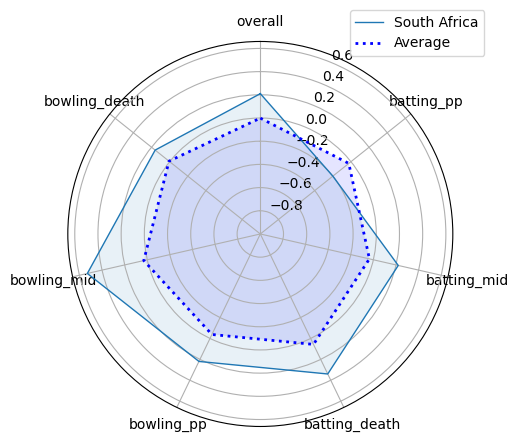

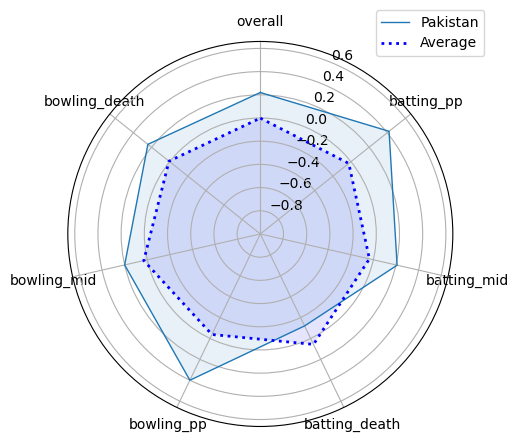

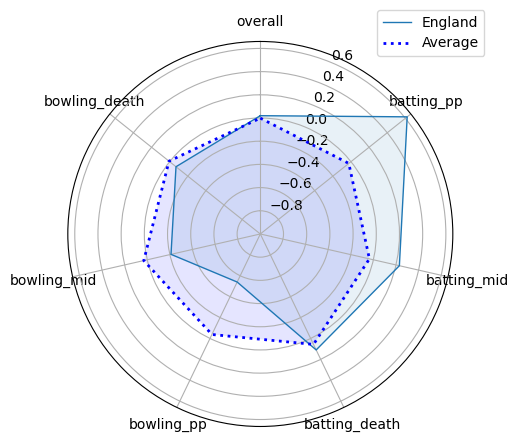

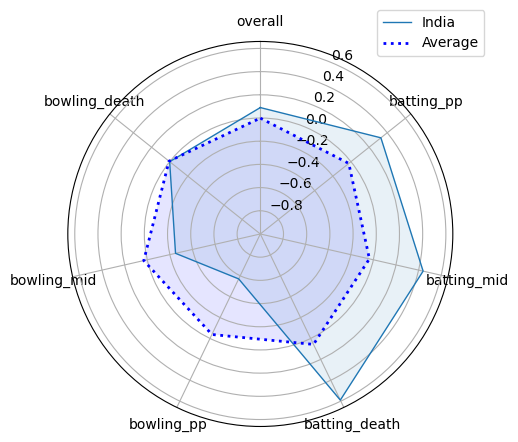

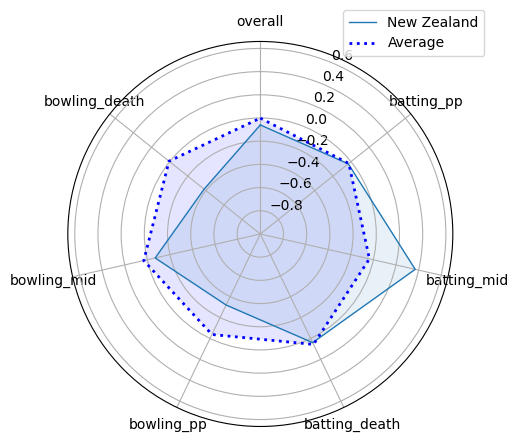

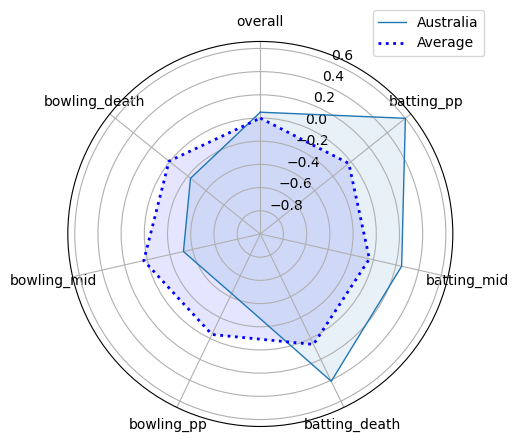

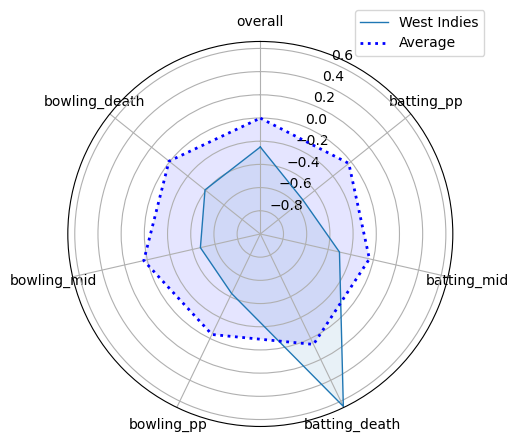

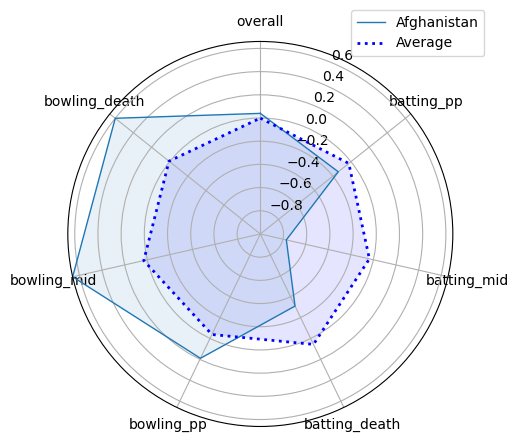

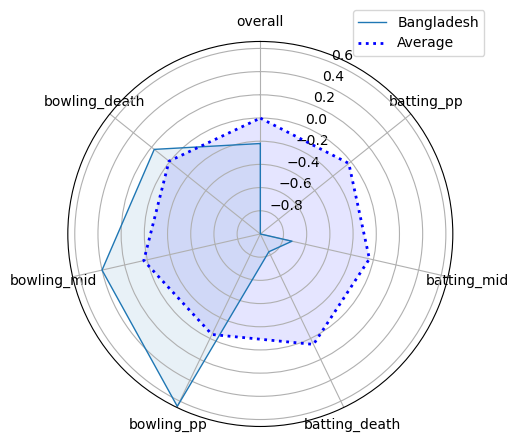

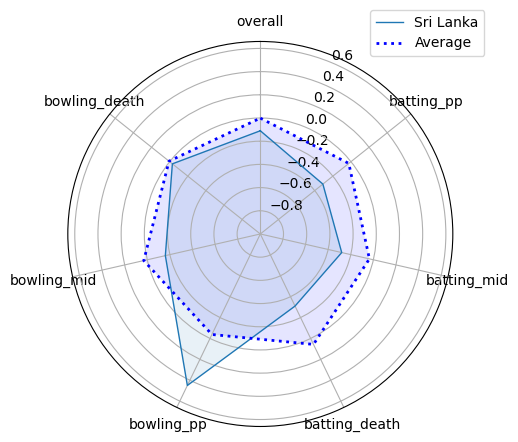

In [47]:
for country in df_phases1.index:
    spider_plot_stats(df_phases1,country)

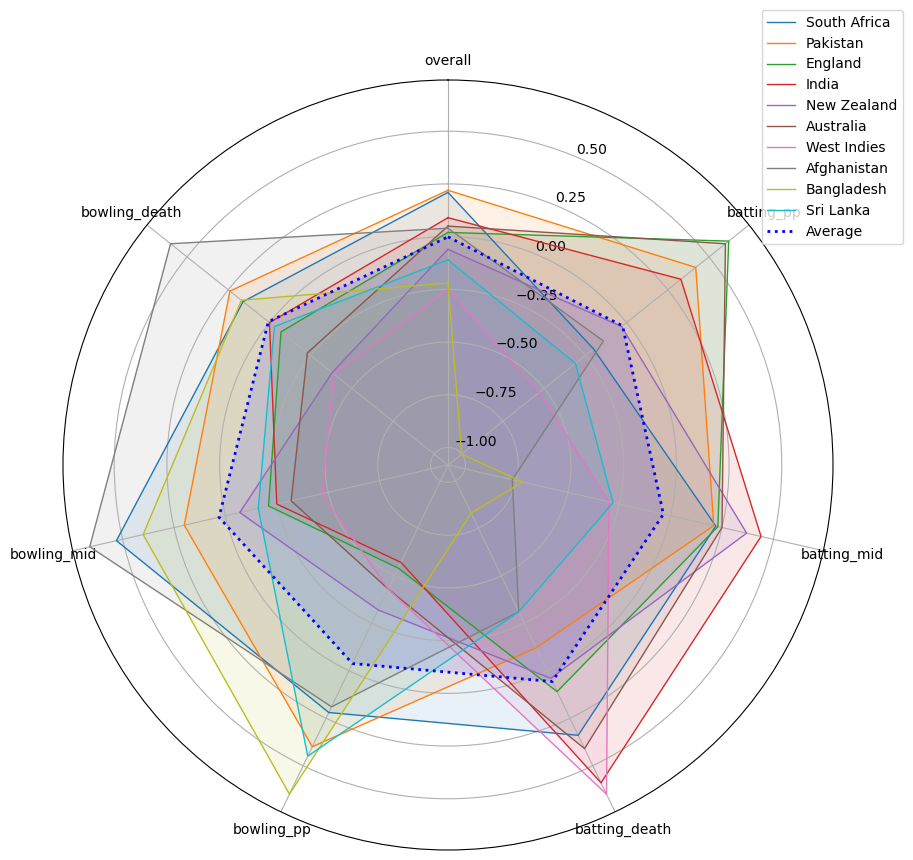

In [48]:
averages = df_phases1.mean()

# Plot
attributes = df_phases1.columns
num_vars = len(attributes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], attributes)

# Plot each individual country
for country in df_phases1.index:
    values = df_phases1.loc[country].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=country)
    ax.fill(angles, values, alpha=0.1)

# Plot the average values
average_values = averages.tolist()
average_values += average_values[:1]
ax.plot(angles, average_values, linewidth=2, linestyle='dotted', label='Average', color='blue')

# Fill area for the average values
ax.fill(angles, average_values, 'b', alpha=0.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.show()

In [49]:
df_phases2

overall  batting_pp  batting_mid  batting_death  bowling_pp  \
Country                                                                         
Canada               0.72        1.17         0.64           1.26        1.02   
Ireland             -0.25        0.15         0.00          -0.24       -0.17   
Namibia             -0.21       -0.25        -0.58           0.42       -0.31   
Nepal                0.14       -0.21         0.36           0.81       -0.43   
Netherlands         -0.60       -0.24        -0.55          -0.58       -0.71   
Oman                -0.16       -0.18        -0.26          -0.68        0.28   
Papua New Guinea     0.17       -0.67        -0.07          -0.19        0.99   
Scotland            -0.19        0.45         0.07          -0.30       -0.30   
Uganda               0.46       -0.46        -0.35          -0.22        1.33   
United States       -0.09        0.29         0.13           0.28       -0.10   

                  bowling_mid  bowling_death  
Country                                       
Canada                  -0.49           0.73  
Ireland                 -0.91          -0.31  
Namibia                 -0.23          -0.28  
Nepal                    0.47          -0.17  
Netherlands             -0.84          -0.68  
Oman                     0.06          -0.18  
Papua New Guinea         0.51           0.44  
Scotland                -0.61          -0.43  
Uganda                   1.17           1.29  
United States           -0.27          -0.86

In [50]:
df3=pd.merge(df[df['bat'].isin(team_df[team_df['p_id'].isna()==False]['Player'])],team_df[team_df['p_id'].isna()==False],left_on='p_bat',right_on='p_id',how='inner').drop(columns=['p_id','Player'])

main_bowling_styles=['RFM', 'RF', 'LF', 'LFM' , 'RWS' , 'LWS', 'RM', 'LM', 'SLA', 'OB',  'RSM','LSM']
df3=df3[df3['bowl_style'].isin(main_bowling_styles)]

df3['bowl_style']=df3['bowl_style'].replace(['RFM', 'RF','RM','RSM'],"Right Arm Pace")
df3['bowl_style']=df3['bowl_style'].replace(['LFM', 'LF','LM','LSM'],"Left Arm Pace")
df3['bowl_style']=df3['bowl_style'].replace(['RWS' , 'LWS'],"Wrist Spin")
df3['bowl_style']=df3['bowl_style'].replace(['SLA'],"Left OffSpin")
df3['bowl_style']=df3['bowl_style'].replace(['OB'],"Right OffSpin")

df3_bowlkind=df3.groupby(['Country','bowl_style']).agg({'p_match':'nunique','batruns':'sum','ballfaced':'sum'}).reset_index().sort_values(by='batruns',ascending=False)

df3_outs=df3[df3['out']==True].groupby(['Country','bowl_style']).size().reset_index(name='count').sort_values(by='count',ascending=False)
df3_outs.rename(columns={'count':'dismissals'},inplace=True)

df3_bowlkind=pd.merge(df3_bowlkind,df3_outs,on=['Country','bowl_style'])
df3_bowlkind=df3_bowlkind[df3_bowlkind['Country'].isin(ranked_df1.index)]

df3_bowlkind['bat_avg']=round(df3_bowlkind['batruns']/df3_bowlkind['dismissals'],2)
df3_bowlkind['bat_sr']=round(df3_bowlkind['batruns']*100/df3_bowlkind['ballfaced'],2)
df3_bowlkind.drop(columns=['p_match','batruns','ballfaced','dismissals'],inplace=True)

In [51]:
df3_bowlkind[df3_bowlkind['Country']=='West Indies']

Country      bowl_style  bat_avg  bat_sr
4   West Indies  Right Arm Pace    25.41  152.13
16  West Indies   Left Arm Pace    27.56  150.90
18  West Indies      Wrist Spin    22.86  126.02
27  West Indies    Left OffSpin    27.54  127.89
31  West Indies   Right OffSpin    27.38  119.78

In [52]:
df3_batting_vs_bowltype=pd.DataFrame()
df3_batting_vs_bowltype['Country']=df3_bowlkind['Country'].unique()

def map_bat_data(df_bat_main, df_bat, style):
    stats=df_bat[df_bat['bowl_style']==style].set_index('Country')[['bat_avg','bat_sr']]
    df_bat_main[f'{style}_avg']=df_bat_main['Country'].map(stats['bat_avg'])
    df_bat_main[f'{style}_sr']=df_bat_main['Country'].map(stats['bat_sr'])
    
# Map phases for both DataFrames
styles=["Right Arm Pace", "Left Arm Pace", "Wrist Spin","Right OffSpin","Left OffSpin"]
for style in styles:
    map_bat_data(df3_batting_vs_bowltype, df3_bowlkind, style)
df3_batting_vs_bowltype.set_index('Country',inplace=True)
df3_batting_vs_bowltype,_=normalization(df3_batting_vs_bowltype.columns,[],df3_batting_vs_bowltype)
df3_batting_vs_bowltype

Right Arm Pace_avg  Right Arm Pace_sr  Left Arm Pace_avg  \
Country                                                                  
England                 0.686836           1.077121           0.627153   
India                   0.999603           0.470771           0.506885   
Australia               1.256071           0.806531          -0.141388   
Pakistan                0.255218          -0.620092           1.073023   
West Indies            -0.226443           1.292461           0.756220   
South Africa            0.336537          -0.260249           0.858888   
New Zealand             0.333409          -0.238998          -0.499258   
Bangladesh             -1.396191          -1.912128          -1.505401   
Afghanistan            -1.877852           0.378685          -1.825137   
Sri Lanka              -0.367188          -0.994102           0.149015   

              Left Arm Pace_sr  Wrist Spin_avg  Wrist Spin_sr  \
Country                                                         
England               0.781838       -0.351414       1.290624   
India                 0.902250        1.819626       0.239230   
Australia             0.815638        0.650290       1.072944   
Pakistan             -0.674734        0.204634       0.032434   
West Indies           1.394464       -0.602862      -0.365920   
South Africa         -0.267020        0.678910       0.951043   
New Zealand           0.206180        0.850631       0.275147   
Bangladesh           -1.779573       -1.216150      -1.931038   
Afghanistan          -0.316664       -1.071005      -0.611898   
Sri Lanka            -1.062378       -0.962658      -0.952567   

              Right OffSpin_avg  Right OffSpin_sr  Left OffSpin_avg  \
Country                                                               
England               -0.111124          1.293558         -0.660993   
India                  1.931017          0.765190          1.720546   
Australia              0.619953          1.057679         -0.764657   
Pakistan              -0.158237         -1.027487          1.180403   
West Indies           -0.790212         -1.065227         -0.431841   
South Africa           0.676814         -0.465152         -0.028098   
New Zealand            0.808408          0.334947          0.503861   
Bangladesh            -1.303591         -1.672850         -1.255696   
Afghanistan           -0.921806          0.363253         -1.018360   
Sri Lanka             -0.751222          0.416090          0.754836   

              Left OffSpin_sr  
Country                        
England              1.255329  
India               -0.020018  
Australia            0.844354  
Pakistan            -0.579474  
West Indies          0.283573  
South Africa         0.564626  
New Zealand          1.185066  
Bangladesh          -1.648009  
Afghanistan         -0.745190  
Sri Lanka           -1.140256

In [53]:
for style in styles:
    df3_batting_vs_bowltype[f'bat_vs_{style}']=round((df3_batting_vs_bowltype[f'{style}_avg']*0.5+df3_batting_vs_bowltype[f'{style}_sr']*0.5),2)
    df3_batting_vs_bowltype.drop(columns=[f'{style}_avg',f'{style}_sr'],inplace=True)
df3_batting_vs_bowltype

bat_vs_Right Arm Pace  bat_vs_Left Arm Pace  bat_vs_Wrist Spin  \
Country                                                                        
England                        0.88                  0.70               0.47   
India                          0.74                  0.70               1.03   
Australia                      1.03                  0.34               0.86   
Pakistan                      -0.18                  0.20               0.12   
West Indies                    0.53                  1.08              -0.48   
South Africa                   0.04                  0.30               0.81   
New Zealand                    0.05                 -0.15               0.56   
Bangladesh                    -1.65                 -1.64              -1.57   
Afghanistan                   -0.75                 -1.07              -0.84   
Sri Lanka                     -0.68                 -0.46              -0.96   

              bat_vs_Right OffSpin  bat_vs_Left OffSpin  
Country                                                  
England                       0.59                 0.30  
India                         1.35                 0.85  
Australia                     0.84                 0.04  
Pakistan                     -0.59                 0.30  
West Indies                  -0.93                -0.07  
South Africa                  0.11                 0.27  
New Zealand                   0.57                 0.84  
Bangladesh                   -1.49                -1.45  
Afghanistan                  -0.28                -0.88  
Sri Lanka                    -0.17                -0.19

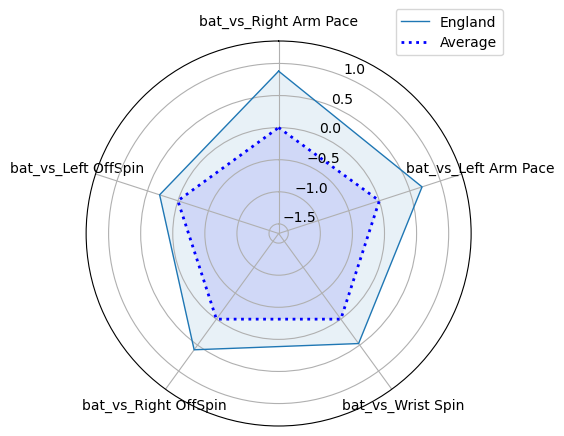

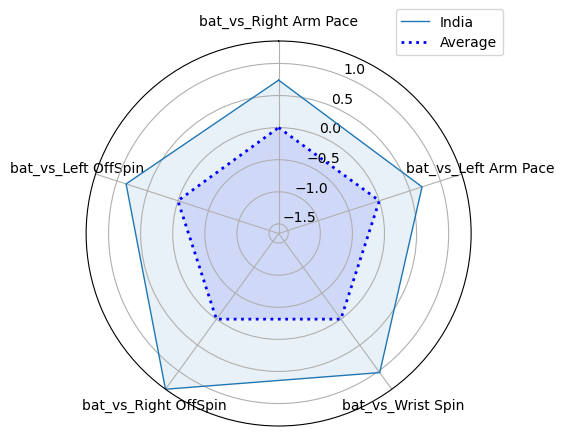

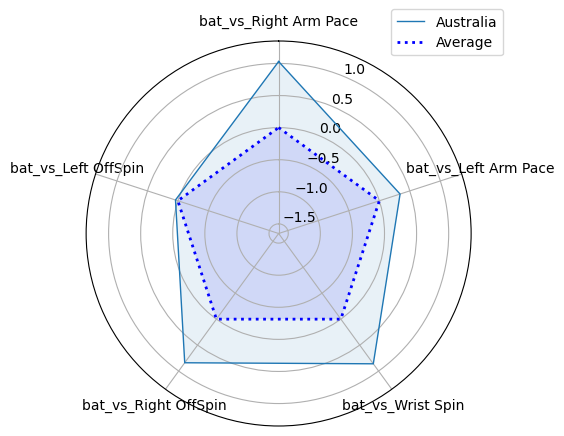

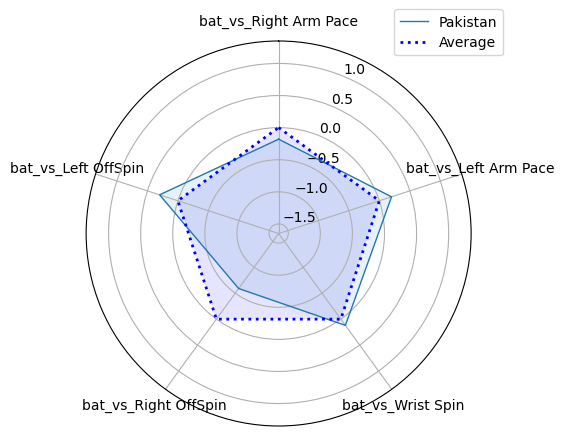

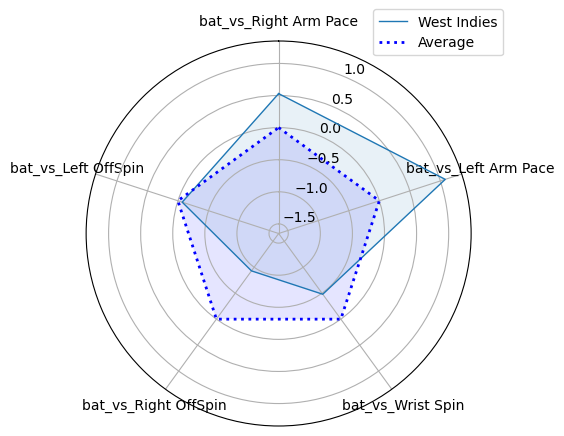

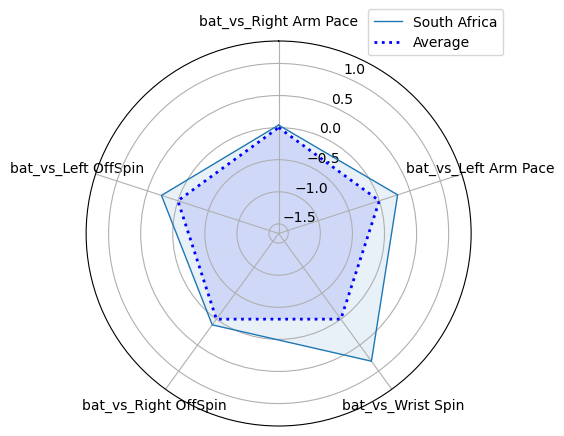

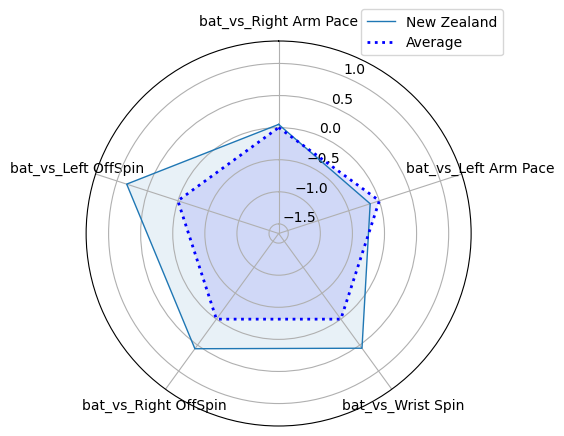

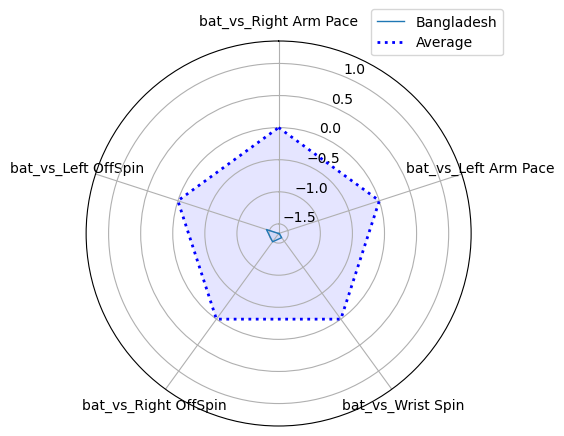

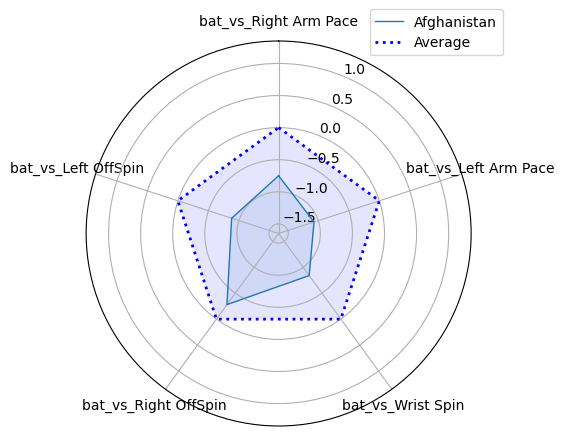

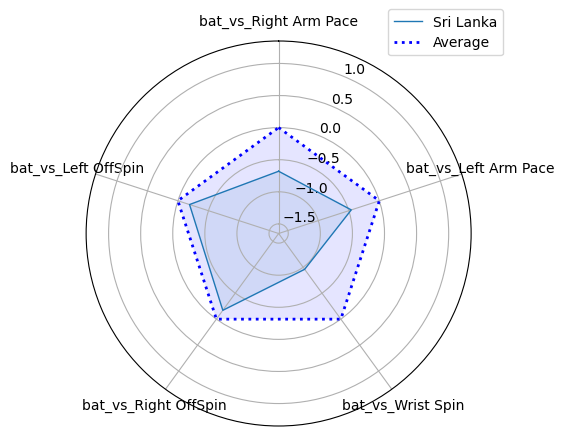

In [54]:
for country in df3_batting_vs_bowltype.index:
    spider_plot_stats(df3_batting_vs_bowltype,country)

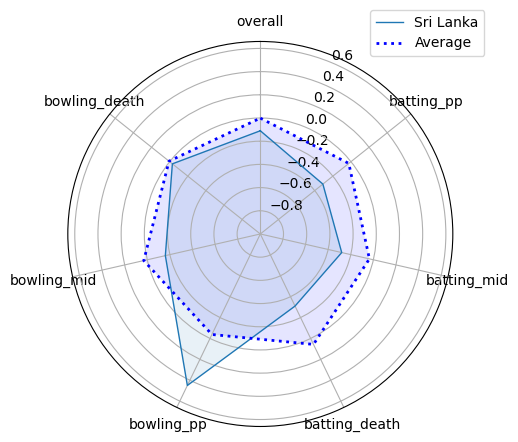

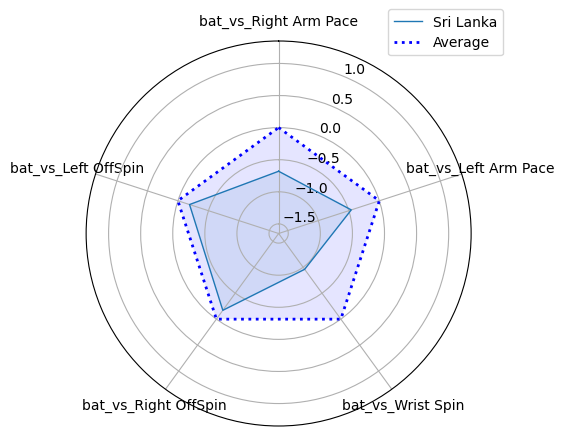

In [55]:
spider_plot_stats(df_phases1,'Sri Lanka')
spider_plot_stats(df3_batting_vs_bowltype,'Sri Lanka')

In [56]:
get_battingstats(df[(df['bat']=='Rahmanullah Gurbaz')&(df['over']>=6)&(df['over']<=14)])

Country  matches_batted  bat_avg  bat_sr  ball_per_wkt   dot%  \
0  Afghanistan              62    25.22  150.41         16.76  34.62   

   boundary%  
0      64.54

In [57]:
get_battingstats(df[(df['bat']=='Ibrahim Zadran')&(df['over']>=6)&(df['over']<=14)])

Country  matches_batted  bat_avg  bat_sr  ball_per_wkt   dot%  \
0  Afghanistan              51    40.56  113.17         35.84  34.15   

   boundary%  
0      43.59

In [58]:
get_bowling_stats(df[(df['bowl']=='Wanindu Hasaranga')])

Country  matches_bowled  economy  bowl_avg  bowl_sr
0  Sri Lanka              26     6.33     13.89    13.17

In [59]:
batting_stats_df = pd.DataFrame()
players=[]
# Iterate over players in Bangladesh team and collect their stats
for p in team_dict['Sri Lanka']:
    bowl_stats=get_bowling_stats(df[df['bowl'] == p])
    print(p,bowl_stats)
    

Wanindu Hasaranga      Country  matches_bowled  economy  bowl_avg  bowl_sr
0  Sri Lanka              26     6.33     13.89    13.17
Charith Asalanka      Country  matches_bowled  economy  bowl_avg  bowl_sr
0  Sri Lanka              30     7.14     21.65     18.2
Kusal Mendis Empty DataFrame
Columns: [Country, matches_bowled, economy, bowl_avg, bowl_sr]
Index: []
Pathum Nissanka Empty DataFrame
Columns: [matches_bowled, economy, Country, bowl_avg, bowl_sr]
Index: []
Kamindu Mendis      Country  matches_bowled  economy  bowl_avg  bowl_sr
0  Sri Lanka              35     7.91     50.08     38.0
Sadeera Samarawickrama Empty DataFrame
Columns: [matches_bowled, economy, Country, bowl_avg, bowl_sr]
Index: []
Angelo Mathews      Country  matches_bowled  economy  bowl_avg  bowl_sr
0  Sri Lanka              58     7.83     32.62     25.0
Dasun Shanaka      Country  matches_bowled  economy  bowl_avg  bowl_sr
0  Sri Lanka             114     8.81     25.75    17.54
Dhananjaya de Silva      Country

In [60]:
get_bowling_stats(df[(df['bowl'].isin(['Matt Henry','Tim Southee']))&(df['over']<6)])

Country  matches_bowled  economy  bowl_avg  bowl_sr
0  New Zealand             219      7.7     27.98     21.8

In [61]:
df_bat_pp=get_battingstats((df[df['over']<=5]))
df_bat_mid=get_battingstats(df[(df['over']>=6)&(df['over']<=14)])
df_bat_death=get_battingstats(df[(df['over']>=15)])
df_bowl_pp=get_bowling_stats(df[df['over']<=5])
df_bowl_mid=get_bowling_stats(df[(df['over']>=6)&(df['over']<=14)])
df_bowl_death=get_bowling_stats(df[(df['over']>=15)])

In [62]:
print(df_bat_pp[df_bat_pp['Country']=='Sri Lanka'])
print(df_bat_mid[df_bat_mid['Country']=='Sri Lanka'])
print(df_bat_death[df_bat_death['Country']=='Sri Lanka'])

      Country  matches_batted  bat_avg  bat_sr  ball_per_wkt   dot%  boundary%
16  Sri Lanka             302    31.33  116.72         26.84  46.76      62.83
      Country  matches_batted  bat_avg  bat_sr  ball_per_wkt   dot%  boundary%
16  Sri Lanka             340    28.87  124.36         23.21  32.45      50.67
      Country  matches_batted  bat_avg  bat_sr  ball_per_wkt   dot%  boundary%
16  Sri Lanka             283     18.7  152.23         12.28  32.48      63.72
